In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
df = pd.read_excel("D:\\NIBIR 192\\CyberBulling_Dataset_Bangla.xlsx")

In [3]:
df

,Unnamed: 0,Description,Label
0,0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,sexual
1,1,আপনার জন্ম প্রক্রিয়ার সময় আপনার মায়ের ভিতর কি ...,sexual
2,2,ধজভংগ দের আর ভায়াগ্রা লাগবো না। ধংস হোক এই সব ...,sexual
3,3,বোকাচোদা একটা।,sexual
4,4,তোর দেশে ফেরার অপেক্ষায় রইলাম। জেলে একটা কামরা...,sexual
...,...,...,...
6005,6005,কপাল পোড়া,Neutral
6006,6006,আল্লাহ আপনাকে হেদায়েত দান করুক আমীন।আমিও একজন ...,Neutral
6007,6007,"শুধু সুন্দর চেহারার হিরো আপনি নন, সুন্দর মনের ...",Neutral
6008,6008,আল্লাহ আপনাকে সুস্থ রাখুক। ভাইরাস থেকে দেশের ম...,Neutral


In [4]:
df=df.drop(['Unnamed: 0'], axis=1)

In [5]:
df['Label'].value_counts()

Political    1205
troll        1202
sexual       1201
Threat       1201
Neutral      1201
Name: Label, dtype: int64

In [6]:
# Define the mapping dictionary
label_mapping = {'Neutral': 0, 'Political': 1, 'troll':1, 'sexual':1,'Threat':1}

# Map the target column to numerical values
df['Label'] = df['Label'].map(label_mapping)

In [7]:
# Preprocess the data
texts = df['Description'].astype(str)
labels = df['Label'].astype(int)

In [8]:
# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [9]:
# Tokenize the text and convert them to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
vocab_size = len(tokenizer.word_index) + 1
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad the sequences to have the same length
max_sequence_length = max(len(seq) for seq in train_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

In [10]:
lstm_params = {
    'dropout_rate': 0.3,
    'units': 100
}

# Define the models
models = {
    'ANN': MLPClassifier(max_iter=500),
    'CNN': Sequential([
        Embedding(vocab_size, 100, input_length=max_sequence_length),
        Conv1D(128, 5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(64, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 100, input_length=max_sequence_length),
        LSTM(units=lstm_params['units'], dropout=lstm_params['dropout_rate'], recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')
    ]),
    'XGB': XGBClassifier(learning_rate=0.1, max_depth=4, n_estimators=300),
    'Random Forest': RandomForestClassifier(max_depth= None, min_samples_leaf= 1,min_samples_split= 10,n_estimators= 100),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.1, max_depth= 5, n_estimators= 200),
    'AdaBoost': AdaBoostClassifier(),
    'Logistic Regression': LogisticRegression(random_state=30),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=30),
    'SVM': SVC(probability=True)
}

Model: ANN
Accuracy: 0.6156405990016639
Precision: 0.8058608058608059
Recall: 0.6853582554517134
F1 Score: 0.7407407407407408
AUC-ROC: 0.5262538180459425


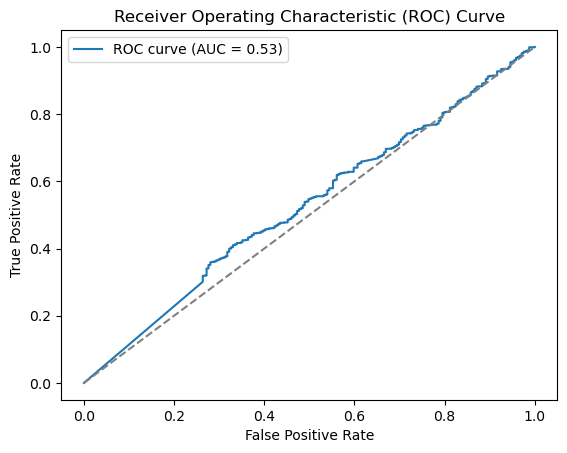

38/38 [==============================] - 0s 6ms/step
Model: CNN
Loss: 0.012489930726587772
Accuracy: 0.9902245998382568
Precision: 0.9064449064449065
Recall: 0.9055036344755971
F1 Score: 0.9059740259740261
AUC-ROC: 0.8758912394582828


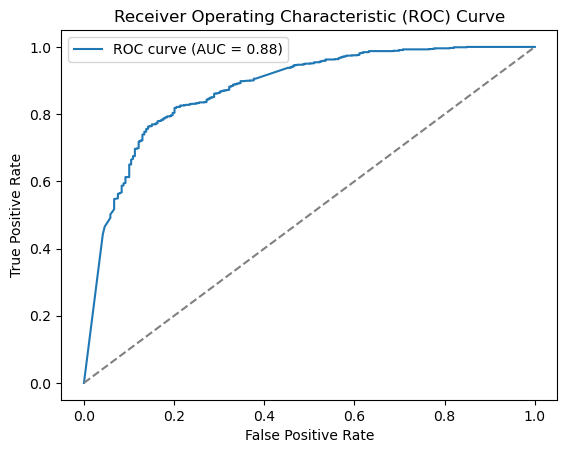

38/38 [==============================] - 1s 35ms/step
Model: LSTM
Loss: 0.0002769155253190547
Accuracy: 1.0
Precision: 0.9032901296111665
Recall: 0.940809968847352
F1 Score: 0.9216683621566633
AUC-ROC: 0.8717853465243289


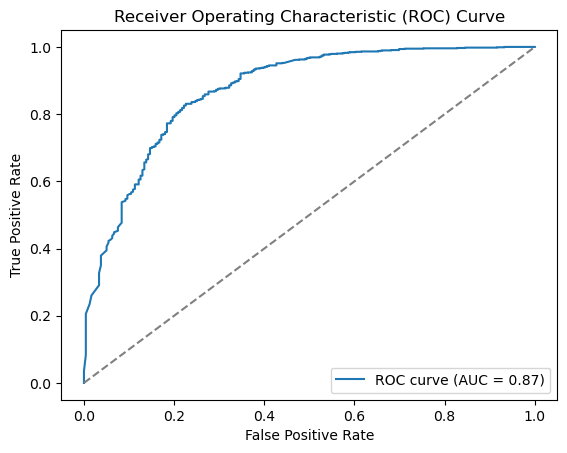

Model: XGB
Accuracy: 0.800332778702163
Precision: 0.8113695090439277
Recall: 0.9781931464174455
F1 Score: 0.8870056497175142
AUC-ROC: 0.6370064781866291


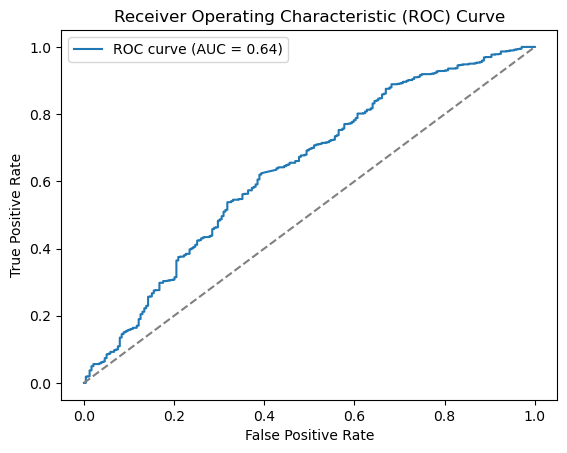

Model: Random Forest
Accuracy: 0.7953410981697171
Precision: 0.8120104438642297
Recall: 0.9688473520249221
F1 Score: 0.8835227272727273
AUC-ROC: 0.6264289159139196


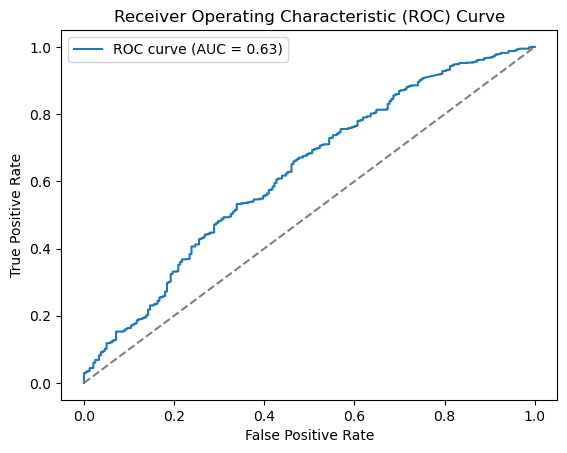

Model: Gradient Boosting
Accuracy: 0.7970049916805324
Precision: 0.8206958073148974
Recall: 0.9553478712357217
F1 Score: 0.8829174664107485
AUC-ROC: 0.6643421664342166


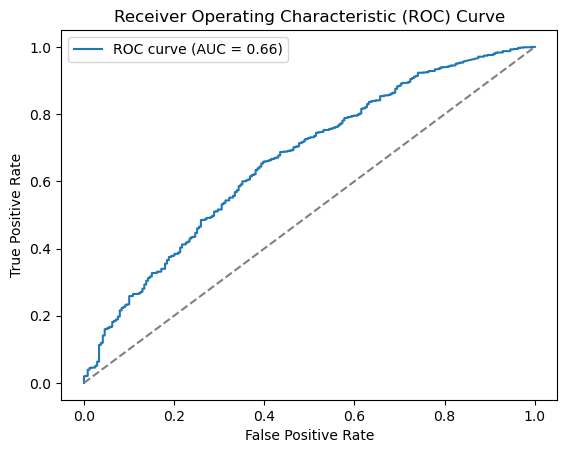

Model: AdaBoost
Accuracy: 0.800332778702163
Precision: 0.8009991673605329
Recall: 0.9989615784008308
F1 Score: 0.88909426987061
AUC-ROC: 0.6103203465460533


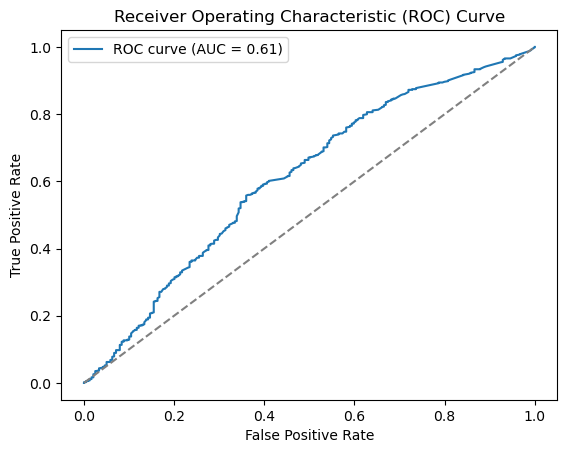

Model: Logistic Regression
Accuracy: 0.7920133111480865
Precision: 0.8008438818565401
Recall: 0.9854620976116303
F1 Score: 0.8836126629422718
AUC-ROC: 0.51324096160447


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


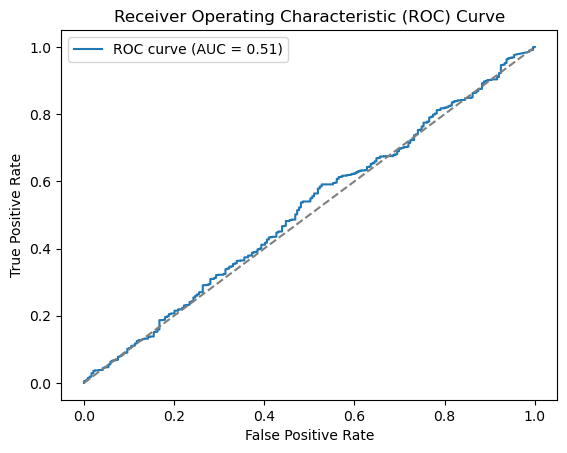

Model: DecisionTreeClassifier
Accuracy: 0.7878535773710482
Precision: 0.8149466192170819
Recall: 0.9511941848390446
F1 Score: 0.877815045519885
AUC-ROC: 0.6076221883323123


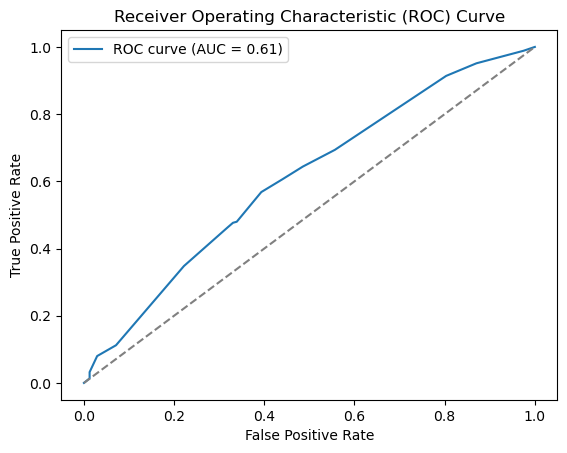

Model: SVM
Accuracy: 0.8011647254575707
Precision: 0.8011647254575707
Recall: 1.0
F1 Score: 0.889607390300231
AUC-ROC: 0.47596206068031827


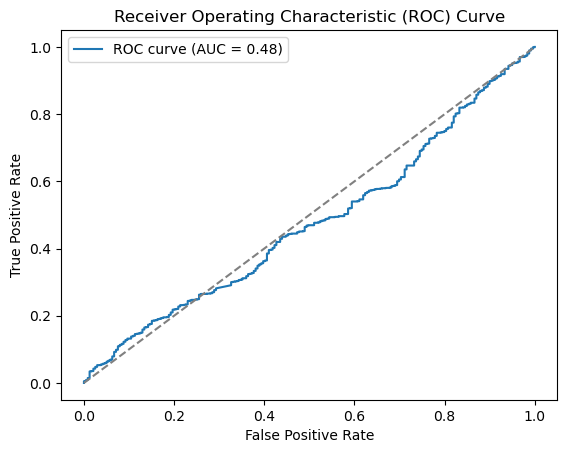

In [11]:
for model_name, model in models.items():
    if model_name in ['CNN', 'LSTM']:
        # Train the deep learning models
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=10, batch_size=32, verbose=0)
        probabilities = model.predict(test_data).flatten()
        predictions = (probabilities > 0.5).astype(int)
        loss = history.history['loss'][-1]
        accuracy = history.history['accuracy'][-1]
        
        precision = precision_score(test_labels, predictions)
        recall = recall_score(test_labels, predictions)
        f1 = f1_score(test_labels, predictions)
        auc_roc = roc_auc_score(test_labels, probabilities)
        fpr, tpr, thresholds = roc_curve(test_labels, probabilities)
    else:
        # Train the other models
        model.fit(train_data, train_labels)
        probabilities = model.predict_proba(test_data)[:, 1]
        predictions = model.predict(test_data)
        loss = None  # No loss calculation for non-deep learning models
        
        accuracy = accuracy_score(test_labels, predictions)
        precision = precision_score(test_labels, predictions)
        recall = recall_score(test_labels, predictions)
        f1 = f1_score(test_labels, predictions)
        auc_roc = roc_auc_score(test_labels, probabilities)
        fpr, tpr, thresholds = roc_curve(test_labels, probabilities)
    
    # Print the results
    print(f"Model: {model_name}")
    if loss is not None:
        print(f"Loss: {loss}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC-ROC: {auc_roc}")
    

    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

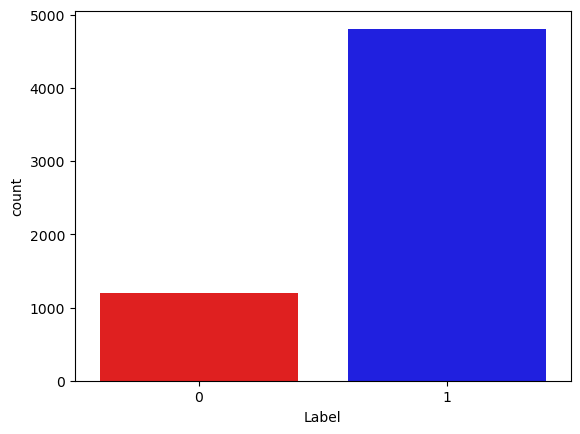

In [12]:
import seaborn as sns
sns.countplot(x='Label',data=df,palette=["#FF0000","#0000FF"])  
plt.show()

In [ ]:
#XGB

In [31]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
train_features = vectorizer.fit_transform(train_texts)
test_features = vectorizer.transform(test_texts)

# Define the XGBoost classifier
model = xgb.XGBClassifier()

# Define the hyperparameters grid for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_features, train_labels)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(test_features)
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Accuracy: 0.8302828618968386


In [ ]:
#Random Forest

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
# Preprocess the text data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Define the Random Forest classifier
model = RandomForestClassifier()

# Define the hyperparameters grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

Best Hyperparameters:
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.826955074875208


In [20]:
# Tokenize the text and convert them to sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
vocab_size = len(tokenizer.word_index) + 1
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

# Pad the sequences to have the same length
max_sequence_length = max(len(seq) for seq in train_sequences)
train_data = pad_sequences(train_sequences, maxlen=max_sequence_length)
test_data = pad_sequences(test_sequences, maxlen=max_sequence_length)

In [21]:
#ANN HYPER

In [22]:
# Preprocess the data
df['Description'] = df['Description'].apply(lambda x: str(x).encode('utf-8').decode('utf-8'))

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
train_features = vectorizer.fit_transform(train_data['Description'])

# Transform the testing data
test_features = vectorizer.transform(test_data['Description'])

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
# Define the XGBoost classifier
model = xgb.XGBClassifier()

# Define the hyperparameters grid for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_texts, train_labels)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(train_features, train_data['Label'])

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Evaluate the best model on the test set
y_pred = best_model.predict(test_features)
accuracy = accuracy_score(test_data['Label'], y_pred)
print("Accuracy:", accuracy)

ValueError: 
All the 135 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\ProgramData\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1471, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "C:\ProgramData\anaconda3\lib\site-packages\xgboost\sklearn.py", line 448, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "C:\ProgramData\anaconda3\lib\site-packages\xgboost\sklearn.py", line 908, in _create_dmatrix
    return DMatrix(**kwargs, nthread=self.n_jobs)
  File "C:\ProgramData\anaconda3\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "C:\ProgramData\anaconda3\lib\site-packages\xgboost\core.py", line 743, in __init__
    handle, feature_names, feature_types = dispatch_data_backend(
  File "C:\ProgramData\anaconda3\lib\site-packages\xgboost\data.py", line 973, in dispatch_data_backend
    return _from_pandas_series(
  File "C:\ProgramData\anaconda3\lib\site-packages\xgboost\data.py", line 467, in _from_pandas_series
    _invalid_dataframe_dtype(data)
  File "C:\ProgramData\anaconda3\lib\site-packages\xgboost\data.py", line 283, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`. 


In [21]:
# Train and evaluate different models
models = {
    'ANN': MLPClassifier(max_iter=500),
    'CNN': Sequential([
        Embedding(vocab_size, 100, input_length=max_sequence_length),
        Conv1D(128, 5, activation='relu'),
        MaxPooling1D(pool_size=2),
        Conv1D(64, 5, activation='relu'),
        GlobalMaxPooling1D(),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        Embedding(vocab_size, 100, input_length=max_sequence_length),
        LSTM(128, dropout=0.2, recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')
    ]),
    'XGB': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian NB': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(probability=True)
}

Model: ANN
Accuracy: 0.6189683860232945
Precision: 0.8168130489335006
Recall: 0.67601246105919
F1 Score: 0.7397727272727272
AUC-ROC: 0.5370703476322685


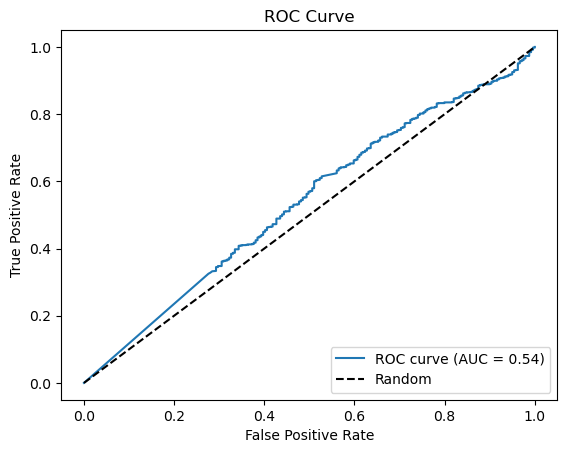

------------------------------
38/38 [==============================] - 0s 6ms/step
Model: CNN
Loss: 0.012477947399020195
Accuracy: 0.9902245998382568
Precision: 0.8937048503611971
Recall: 0.8992731048805815
F1 Score: 0.8964803312629399
AUC-ROC: 0.8698562285744079


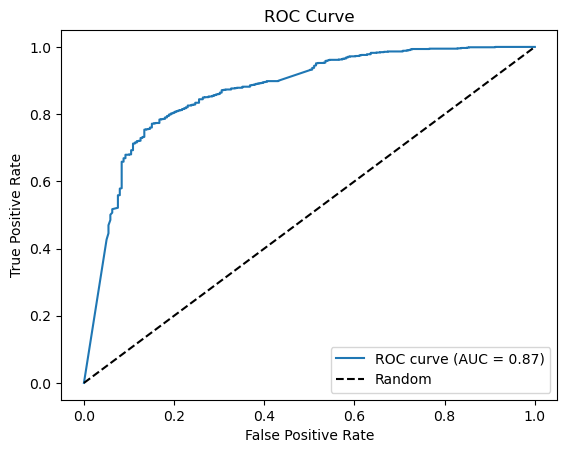

------------------------------


In [ ]:
for model_name, model in models.items():
    if model_name in ['CNN', 'LSTM']:
        # Train the deep learning models
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        history = model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=10, batch_size=32, verbose=0)
        probabilities = model.predict(test_data).flatten()
        predictions = (probabilities > 0.5).astype(int)
        loss = history.history['loss'][-1]
        accuracy = history.history['accuracy'][-1]
        
        precision = precision_score(test_labels, predictions)
        recall = recall_score(test_labels, predictions)
        f1 = f1_score(test_labels, predictions)
        auc_roc = roc_auc_score(test_labels, probabilities)
        fpr, tpr, thresholds = roc_curve(test_labels, probabilities)
    else:
        # Train the other models
        model.fit(train_data, train_labels)
        probabilities = model.predict_proba(test_data)[:, 1]
        predictions = model.predict(test_data)
        loss = None  # No loss calculation for non-deep learning models
        
        accuracy = accuracy_score(test_labels, predictions)
        precision = precision_score(test_labels, predictions)
        recall = recall_score(test_labels, predictions)
        f1 = f1_score(test_labels, predictions)
        auc_roc = roc_auc_score(test_labels, probabilities)
        fpr, tpr, thresholds = roc_curve(test_labels, probabilities)
    
    # Print the results
    print(f"Model: {model_name}")
    if loss is not None:
        print(f"Loss: {loss}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"AUC-ROC: {auc_roc}")
    
    # Plot ROC curve with AUC-ROC score
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    print("------------------------------")